## Практическое задание №6 Модель камеры

**Цель**

Изучить модель камеры с точечной диафрагмой, научиться использовать матрицы камер, проецировать точки трехмерного пространства и
производить простую калибровку камеры.


In [6]:
import cv2 
import numpy as np 
import os
import matplotlib.pyplot as plt 

In [30]:
path_images_folder = r"E:\GitHub\Mag_2_semester\TechVision\PW_6\images"

In [31]:
path_images = [os.path.join(path_images_folder, path) for path in os.listdir(path_images_folder)]

In [107]:
images = [cv2.imread(path_image) for path_image in path_images]

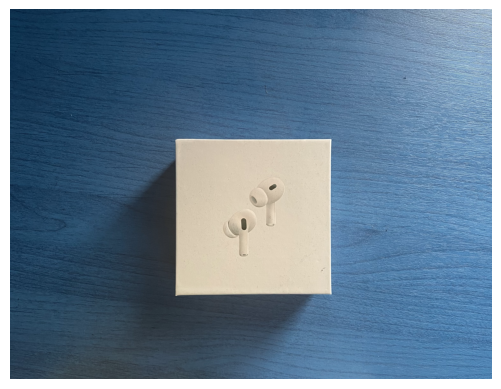

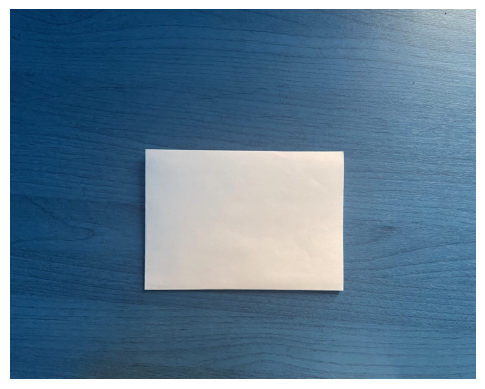

In [108]:
for image in images:
    plt.imshow(image)
    plt.axis(False)
    plt.show()

In [186]:
class Camera:
    def __init__(self) -> None:
        pass 

    def calibrate(self, px_w, px_h, real_w, real_h, distance, c_x = 0, c_y = 0):
        fx = px_w*distance/real_w
        fy = px_h*distance/real_h
        self.k = np.array([
            [fx, 0, c_x],
            [0, fy, c_y],
            [0,  0,  1 ]
        ])
        self.scale = distance


    def calc_3d_coords(self, image):
        self.box = box = self.aling_center(image)
        coords = []
        
        px_coord = np.array([box[0], box[1], 1])
        coords.append(np.matmul(np.linalg.inv(self.k), px_coord.T))

        px_coord = np.array([box[0]+box[2], box[1], 1])
        coords.append(np.matmul(np.linalg.inv(self.k), px_coord.T))

        px_coord = np.array([box[0], box[1]+box[3], 1])
        coords.append(np.matmul(np.linalg.inv(self.k), px_coord.T))

        px_coord = np.array([box[0]+box[2], box[1]+box[3], 1])
        coords.append(np.matmul(np.linalg.inv(self.k), px_coord.T))

        coords = [coord*self.scale for coord in coords]
        
        self.coords = coords
        return coords 
    
    def state(self):
        print("Координаты описывающего прямоугольника: ", *self.box )
        print("Координаты углов объекта метрических координатах: ")
        for i, coord in enumerate(self.coords):
            print(f"Угол {i}:", *coord)
        w,h = self.get_size()
        print("Размер объекта: ", w, h)
        print("Площадь объекта: ", h*w )
    
    def get_size(self):
        w =( self.coords[3][0] -  self.coords[0][0]) 
        h =( self.coords[3][1] -  self.coords[0][1]) 
        return round(w,2), round(h,2)
    
    def aling_center(self, image):
        box = self.__bounding_box(image)
        h, w,_ = image.shape
        return [box[0]-h/2, box[1]-w/2, *box[2:]]
    
    @staticmethod
    def __bounding_box(image):
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        _, img_binary =  cv2.threshold(img, 185, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(img_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        return  cv2.boundingRect(max(contours, key = cv2.contourArea))

   
    

In [187]:
camera = Camera()

In [188]:
# изображение для настройки
box = camera.aling_center(images[0]) 
px_w, px_h = box[2:]
cm_w, cm_h = 10, 10
distance = 36

camera.calibrate(px_w, px_h, cm_w, cm_h, distance)

**Изображение 1**

Размер: 10 x 10


In [191]:
coords = camera.calc_3d_coords(images[0])
camera.state()

Координаты описывающего прямоугольника:  -122.0 -698.0 980 977
Координаты углов объекта метрических координатах: 
Угол 0: -1.2448979591836735 -7.1443193449334705 36.0
Угол 1: 8.755102040816327 -7.1443193449334705 36.0
Угол 2: -1.2448979591836735 2.8556806550665303 36.0
Угол 3: 8.755102040816327 2.8556806550665303 36.0
Размер объекта:  10.0 10.0
Площадь объекта:  100.0


**Изображение 2**

Размер: 14.5 x 10.5

In [192]:
coords = camera.calc_3d_coords(images[1])
camera.state()

Координаты описывающего прямоугольника:  -326.0 -603.0 1293 918
Координаты углов объекта метрических координатах: 
Угол 0: -3.326530612244898 -6.17195496417605 36.0
Угол 1: 9.86734693877551 -6.17195496417605 36.0
Угол 2: -3.326530612244898 3.224155578300921 36.0
Угол 3: 9.86734693877551 3.224155578300921 36.0
Размер объекта:  13.19 9.4
Площадь объекта:  123.986


## Вывод

В результате настройки камеры на 1 изображении погрешность составила 0%, так как каллибровка проходила на этом же изображении 

В результате определения размера объекта на 2 изоображении погрешность составила 18%, при учете погрешности стоит учитовать программное определение размеров объекта